# Convolutional Neural Network

In [ ]:



train_img = train_data[:,:-1].view(60000,1,28,28)
plt.imshow(ex.numpy()[0], cmap = "Greys")

torch_train = data.TensorDataset(train_img, train_data[:,-1])
train_loader = data.DataLoader(torch_train, batch_size=32)
example_x, example_y =  next(iter(train_loader))

conv1 = nn.Conv2d(1, 3, 3,padding = 1)


conv2 = nn.Conv2d(3, 6, 3,stride =2,padding = 1)


a = nn.Sequential(nn.Conv2d(1, 3, 3,padding = 1), nn.Conv2d(3, 6, 3,padding = 1))

tada =a(example_x)
tada.shape


In [3]:
import torch
from torch import nn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from torch.utils import data

Zunächst laden wir wieder die Trainingsdaten ein und konverteiren Sie zu einem Tensor. Insgesamt sindes 60,000 Bilder und 784 Pixel + eine Splate für die Labels der Bilder. 

In [7]:
train_data = np.genfromtxt('../data/mnist/mnist_train.csv', delimiter=',', skip_header =False)
train_data = torch.tensor(train_data, dtype= torch.float)
train_x = train_data[:,:-1]
train_y = train_data[:,-1]
print(train_x.shape, train_y.shape)

torch.Size([60000, 784]) torch.Size([60000])


Bisher haben wir Bilder immer als 1D Input in unsere Neuronales Netzwerk eingeführt. Wir wollen diesmal aber die 2D Struktur benutzen. Dafür müssen wir aus einem Vektor der Länge `784` eine Matrix mit den Maßen `28 x 28` machen.

Hierfür können wir die Funktion `vektor.view(28,28)` benutzen.

In [9]:
train_x[0,:].view(28,28).shape

torch.Size([28, 28])

Wir können uns dieses Bild anschauen, können aber nicht viel erkennen. Man könnte eventuell erahnen, um welche Zahl es sich handeln soll. 

In [13]:
train_x[0,:].view(28,28)

tensor([[  5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,

Doch mithilfe von `matplotlib` können wir Pixel Arrays auch darstellen. `cmap = "Greys"` gibt hierbei an, dass wir unser Farbspektrum nur Schwarz-Weiß haben wollen.

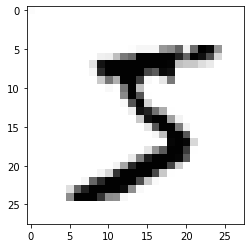

In [16]:
plt.imshow(train_x[0,:].view(28,28), cmap= "Greys")

Wir haben bis jetzt nur ein Bild das richtige Format gebracht, um alle Bilder auf einmal in dem richtigen Format zu bringen, können wir aber auch `.view()` benutzen. Das Tensor oben hatte den Format `(Höhe,Breite)`. Damit wir alle Bilder konvertieren können, müssen wir denn `tensor` um eine weitere Dimension erweitern.  Wir wollen einen `tensor` mit den Dimensionen `(Anzahl Bilder, Höhe, Breite)`.

Allerdings würde hier PyTorch einen Strich durch die Rechnung machen. PyTorch kann sowohl mit Schwarz-Weiß Bildern, als auch mit farbigen Bildern arbeiten. In PyTorch werden farbige Bilder über drei Matrizen dargestellt. Eine für Rot, eine für Grün und eine für Blau. Diese werden auch als Channel bezeichnet. Also ein farbiges Bild hat 3 Channel, ein s/w Bild hat aber nur einen.
Ein farbiges Bild würde in PyTorch die Dimensionen `(3, Höhe, Breite)` haben. Deswegen geht PyTorch davon aus, dass alle Bilder aus drei Dimensionen besteht. Für eine Schwarz/Weiß Bild brauchen wir deshalb auch eine weitere Dimension. Die dritte Dimension hat aber nur die Größe eins, da wir nur einen Channel haben.

# BILD DAS CHANNEL ERKLÄRT

Deshalb stellen wir ein s/w Bild wie folgt dar: `(1, Höhe, Breite)`. Daraus folgt, dass alle Bilder vom MNIST Datensatz diesem Format entsprechen müssen: `(Anzahl Bilder, 1, Höhe, Breite)`



Konvertieren Sie `train_x` in dieses Format.

In [ ]:
train_x = train_x.view(_____,1,____,____)
train_x.shape

<details>
<summary><b>Lösung:</b></summary>
    
```python 
train_x = train_x.view(60000,1,28,28)
```
</details>

Sie haben jetzt alle Bilder in das Format `(1,28,28)` konvertiert.
Sie können jetzt immer noch die Bilder mit `plt.imshow` anzeigen lassen.

Beachten Sie, wie jetzt der Tensor indiziert ist. `[0,0,:,:]`. Wir wählen das erste Bild aus, und auch den ersten und einzigen Channel. Wir wählen natürlich die gesamte Höhe und Breite aus, um das Bild komplett darzustellen.

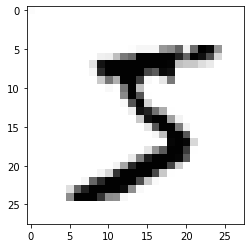

In [23]:
plt.imshow(train_x[0,0,:,:], cmap= "Greys")

Wie letzte Woche können Sie sich auch diesmal einen `DataLoader` benutzen. Dafür müssen wir erst ein TensorDataset erstellen. Mit `next(iter())` können wir uns den ersten Batch des Dataloaders ausgeben lassen.

In [24]:
torch_train = data.TensorDataset(_____, ____)
train_loader = data.DataLoader(______, batch_size=32)

batch_x, batch_y =next(iter(train_loader))
print(batch_x.shape, batch_y.shape)

NameError: name '_____' is not defined

<details>
<summary><b>Lösung:</b></summary>
    
```python 
torch_train = data.TensorDataset(train_x,train_y)
train_loader = data.DataLoader(torch_train, batch_size=32)

batch_x, batch_y =next(iter(train_loader))
print(batch_x.shape, batch_y.shape)
```
</details>

Wie Sie sehen können, hat der `batch_x` die Dimensionen `[32, 1, 28, 28]`. Also `32` Bilder, die Größe unseres Batches, `1`Channel, `28` Pixel in der Höhe und `28` in der Breite.

## CNNs in PyTorch erstellen.

Wir haben soweit unsere Daten im richtigen Format, jetzt beschäftigen wir uns mit dem erstellen von `CNN` in PyTorch. Sowie es `linear` layers in PyTorch gibt, gibt es auch Convolutional Layers im `nn` Modul.

`nn.Conv2d()` ist so eine Layer. Bevor wir Sie benutzen, besprechen wir kurz die wichitgsten Parameter.

`in_channels`
`out_channels`
`kernel_size`


In [ ]:
conv1 = conv1 = nn.Conv2d(1, 3, 3)